# Assignment A2 [50 marks]

This is the second assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 2.1, and 2.2 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail! As exception, your `gamma_n` function will be available to your `gamma_n_inverse` function in 2.2.
- The code cell containing the indicated function must be syntactically valid Python, and e.g. must not use 'magic commands' (such as commands starting `%matplotlib`).
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A2.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. If you haven't already done this for A1, go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A2" on Gradescope, and click "Submit".
5. Select your `A2` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Numerical differentiation

**1.1** We consider a finite difference approximation for a first derivative of the form

$$F'(x) \approx \frac{1}{h} \sum_{i = 0}^{N - 1} \alpha_i F ( x_0 + h \beta_i ).$$

Write a function `finite_difference` which takes the following arguments.

  - A `callable` defining $F$. This function may be assumed to accept a single floating point input argument defining, say, $x$, and may be assumed to return a floating point value corresponding to $F(x)$.
  - A `float` defining $x_0$.
  - A `float` defining $h$.
  - A shape `(N,)` NumPy array with floating point data type defining $\alpha$, where the $i$th element counting from zero corresponds to $\alpha_i$.
  - A shape `(N,)` NumPy array with floating point data type defining $\beta$, where the $i$th element counting from zero corresponds to $\beta_i$.

The function `finite_difference` should return the finite difference approximation for the first derivative at $x_0$ defined using the formula above, as a `float`.

After your function definition add code which checks your function behaves correctly for some simple cases. Your verification code should be clear, easy to understand, commented as necessary, and should display a small amount of relevant output.

The function must have the form

```
def finite_difference(F, x_0, h, alpha, beta):
    ...
    return derivative_approximation
```

**[5 marks]**

In [1]:
import numpy as np


def finite_difference(F, x_0, h, alpha, beta):
    return sum(alpha_i * F(x_0 + h * beta_i) for alpha_i, beta_i in zip(alpha, beta)) / h


def F(x):
    return x


# One sided first order differencing of a linear function is exact, except for roundoff
x_0 = 0.1
h = 1.0e-2
Fp_approx = finite_difference(F, x_0, 1.0e-2,
                              np.array([-1, 1], dtype=float),
                              np.array([0, 1], dtype=float))
Fp_exact = 1.0
Fp_error_magnitude = abs(Fp_approx - Fp_exact)
print("One sided first order differencing of a linear function")
print(f"Error magnitude = {Fp_error_magnitude}")
assert Fp_error_magnitude < 1.0e-14


def F(x):
    return x * x


# Second order centred differencing of a quadratic function is exact, except for roundoff
x_0 = 0.1
h = 1.0e-2
Fp_approx = finite_difference(F, x_0, 1.0e-2,
                              np.array([-0.5, 0.5], dtype=float),
                              np.array([-1, 1], dtype=float))
Fp_exact = 2 * x_0
Fp_error_magnitude = abs(Fp_approx - Fp_exact)
print("Second order centred differencing of a quadratic function")
print(f"Error magnitude = {Fp_error_magnitude}")
assert Fp_error_magnitude < 1.0e-14

One sided first order differencing of a linear function
Error magnitude = 5.551115123125783e-16
Second order centred differencing of a quadratic function
Error magnitude = 1.1102230246251565e-16


**1.2** Consider $N = 3$, let

$$\beta = \left( \begin{array}{c} -2 \\ -1 \\ 0 \end{array} \right),$$

and let $\alpha$ be defined by

$$\alpha = \left( \begin{array}{ccc} 0 & 0 & 1 \end{array} \right) M^{-1} A$$

where $M$ and $A$ are $3 \times 3$ matrices defined by

$$M = \frac{1}{15} \left( \begin{array}{ccc} 4 & 2 & -1 \\ 2 & 16 & 2 \\ -1 & 2 & 4 \end{array} \right),$$
$$A = \frac{1}{6} \left( \begin{array}{ccc} -3 & 4 & -1 \\ -4 & 0 & 4 \\ 1 & -4 & 3 \end{array} \right).$$

Investigate the accuracy of the finite difference approximation. Summarize your results in a discussion of no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

Matplotlib is building the font cache; this may take a moment.


alpha=array([ 0.5, -2. ,  1.5])
np.log(error_magnitude[1:] / error_magnitude[:-1]) / np.log(h[1:] / h[:-1])=array([-3.98653945,  0.94392531,  0.34767032, -0.28059961, -0.66776039,
       -1.85949806, -6.09450096,  1.16451653,  2.88118517, -4.26222501,
       -0.34174196,  1.88863315,  2.52725353,  2.01840739,  1.98950361,
        1.99421843,  2.00156912,  2.00008871,  1.99981945,  1.99976725,
        1.9996104 ,  1.99937568,  1.99899907,  1.99839496,  1.99742199,
        1.99585563,  1.99332764,  1.9892325 ,  1.98255907,  1.97158166,
        1.95325844,  1.92197572,  1.86669574,  1.76372423,  1.55498091,
        1.05711021, -1.01798718,  3.49622845,  2.65931624])


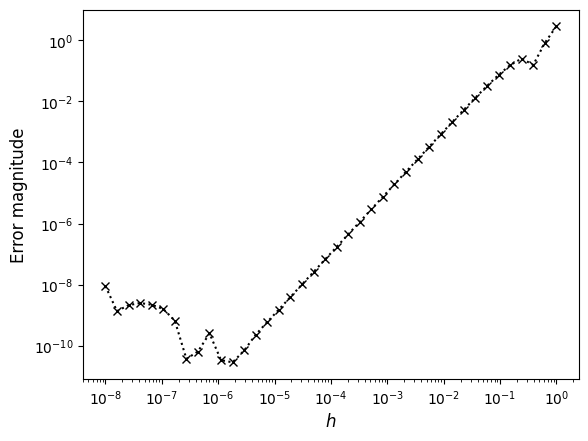

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


def F(x):
    return np.exp(x) * np.sin(np.pi * x)


def Fp(x):
    return F(x) + np.pi * np.exp(x) * np.cos(np.pi * x)


Pi = np.array([0, 0, 1], dtype=float)
M = np.array([[4, 2, -1],
              [2, 16, 2],
              [-1, 2, 4]], dtype=float) / 15
A = np.array([[-3, 4, -1],
              [-4, 0, 4],
              [1, -4, 3]], dtype=float) / 6

# We use
#     Pi M^{-1} A = (A^T M^{-T} Pi^T)^T
# so that we can avoid computing M^{-1}
alpha = A.T @ np.linalg.solve(M.T, Pi)
print(f"{alpha=}")
beta = np.array([-2, -1, 0], dtype=float)

h = np.logspace(-8, 0, 40)
x_0 = 0.1
error_magnitude = np.array([abs(Fp(x_0) - finite_difference(F, x_0, h_i, alpha, beta)) for h_i in h], dtype=float)

fig, ax = plt.subplots(1, 1)
ax.loglog(h, error_magnitude, "kx:")
ax.set_xlabel("$h$", fontsize="large")
ax.set_ylabel("Error magnitude", fontsize="large")

print(f"{np.log(error_magnitude[1:] / error_magnitude[:-1]) / np.log(h[1:] / h[:-1])=}")





## Discussion

We choose a function for which we have an explicit formula for the derivative, here

$$F(x) = e^x \sin ( \pi x ),$$

with

$$F'(x) = F(x) + \pi e^x \cos ( \pi x ).$$

A convergence test is then performed: we choose a number of different values of $h$, and measure the magnitude of the error at each $h$

$$e_h = |F'(x) - D(x)|,$$

where $D(x)$ is the approximation given by our finite difference formula. The magnitude of the error is plotted against $h$ on a log-log plot. We see that this is approximately a straight line for a broad range of $h$. This suggests the ansatz

$$e_h \approx K h^p,$$

for some $K$, which is consistent with the scheme being $p$th order accurate. Taking this approximation to be an equality we then have, for any $\alpha > 0$,

$$e_h = K h^p,$$
$$e_{\alpha h} = K \alpha^p h^p,$$

which after some algebra leads to

$$p = \log \left( \frac{e_{\alpha h}}{e_h} \right) / \log \alpha.$$ We can therefore use this formula to estimate $p$, specifically considering a range of different values for $h$ and using consecutive values, differing by the same factor $\alpha$, to estimate $p$. We find that we have $p \approx 2$ for a broad range of values of $h$, suggesting second order accuracy. For $h$ too large we do not expect to see the asymptotic convergence rate for the finite difference approximation, and for $h$ too small the result is expected to be strongly affected by the use of finite precision arithmetic.

## Question 2: Function inverse

For each non-negative integer $n$ we define a function $\gamma_n : \mathbb{R} \rightarrow \mathbb{R}$ where

$$\gamma_n ( x ) = \begin{cases} \frac{1}{(n + 1)!} & \text{if} ~ x = 0 \\
                                 \frac{e^x - \sum_{k = 0}^n \frac{1}{k!} x^k}{x^{n + 1}} & \text{otherwise} \end{cases}.$$

**2.1** Write a function named `gamma_n` which takes as input two arguments named `n` and `x`, defining $n$ and $x$ respectively, where $x \ge 0$, and which returns the result of $\gamma_n ( x )$. You may assume that `n` is an `int` and that `x` is a non-negative `float`.

The function must have the form

```
def gamma_n(n, x):
    ...
    return y
```

Autograder tests will consider up to $n = 6$.

**[4 marks]**

In [3]:
from itertools import count
from math import factorial


def gamma_n(n, x):
    tol = 1e-10
    
    y = 0.0
    num, den = 1, factorial(n + 1)
    for k in count(start=n + 2):
        t = num / den
        y += t
        if abs(t) < tol:
            break
        num *= x
        den *= k

    return y


**2.2** Write a function named `gamma_n_inverse` which takes as input two arguments named `n` and `y`, defining $n$ and $y$ respectively, where $y \ge \gamma_n (0)$, and which returns a value $x$ such that $\gamma_n ( x ) = y$. You may assume that `n` is an `int` and that `y` is a `float`.

In a discussion of not more than $400$ words explain and justify any decisions made in your code.

The function must have the form

```
def gamma_n_inverse(n, y):
    ...
    return x
```

Autograder tests will consider up to $n = 6$.

Your `gamma_n` function defined above will be available to your `gamma_n_inverse` function defined here, when run in the autograder. However you should define all other necessary objects, and in particular import any required modules, in the code cell in which `gamma_n_inverse` is defined.

**[8 marks]**

In [4]:
from functools import partial


def gamma_n_inverse(n, y):
    r"""Find a value for :math:`x` such that :math:`\gamma_n(x) = y` for
    :math:`y \ge \gamma_n(0)`.

    Parameters
    ----------

    n : int
        Defines :math:`n`.
    y : float
        Defines :math:`y`.

    Returns
    -------

    float
        Defines :math:`x`.
    """
    
    tol = 1e-10

    gamma = partial(gamma_n, n)

    # Find initial bracket [a, b]
    a, b = 0, 1
    gamma_a, gamma_b = gamma(a), gamma(b)
    while gamma_b < y:
        # Double b until an appropriate upper bound is found
        b *= 2
        gamma_b = gamma(b)

    # Binary search
    while True:
        if y < gamma_a or y > gamma_b:
            raise ValueError("Invalid y")

        c = 0.5 * (a + b)
        if abs(b - a) < tol:
            # Converged when the bracket is small enough
            break
        gamma_c = gamma(c)
        if gamma_c >= y:
            # Zoom in on the left side
            b = c
            gamma_b = gamma_c
        else:
            # Zoom in on the right side
            a = c
            gamma_a = gamma_c

    # Return the middle value
    return c

## Discussion


If we can find some $a \ge 0$ and $b > a$ such that

$$\gamma_n(a) \le y \le \gamma_n(b),$$

then, since $\gamma_n$ is continuous, there must (by the intermediate value theorem) be some $x \in [a, b]$ such that $\gamma_n(x) = y$. We have

$$\gamma_n ( x ) = \frac{1}{(n + 1)!} + \sum_{k = 1}^\infty \frac{1}{(k + n + 1)!} x^k.$$

All terms in the summation above are strictly positive for $x > 0$, and hence $\gamma_n(x) > \gamma_n(0)$ for all $x > 0$. Hence we can choose $a = 0$. To find some appropriate $b$, we note that $\gamma_n(x)$ is not bounded above on $x \in [0, \infty)$ -- since each term in the summation above is non-negative for $x \ge 0$, and no term in this summation is bounded above. Moreover we have

$$\gamma_n' ( x ) = \sum_{k = 1}^\infty \frac{k}{(k + n + 1)!} x^{k - 1},$$

and this is strictly positive for $x > 0$, since each term in summation is. Hence $\gamma_n(x)$ is, on $x \in [0, \infty)$, continuous, increasing, and not bounded above. So long as we choose $b$ large enough we will therefore have $y \le \gamma_n(b)$. We find a large enough $b$ by starting from $b = 1$, and then successively doubling, $b \gets 2 b$, until we have $y \le \gamma_n(b)$.

We finally find a value $x$ such that $\gamma_n(x) = y$, to within some tolerance, using a binary search. In each step we consider $c$ at the mid-point between $a$ and $b$, $c \gets (a + b) / 2$. If $\gamma_n(c) \ge y$ then we set $b \gets c$, otherwise we set $a \gets c$, 'zooming in' on the desired value of $x$, until we have $|b - a|$ less than some tolerance. This equivalent to applying the bisection root finding algorithm with the residual function $F(x) = \gamma_n(x) - y$.

## Question 3: Numerical differential equations

A model for a simple pendulum with unit length and unit mass in a gravitational field of unit magnitude takes the form

$$\frac{d^2 \theta}{d t^2} = -\sin \theta \qquad t > 0,$$

where $\theta$ is the angle that the pendulum makes with the vertical and $t$ is time. This is supplemented with some initial conditions for $\theta$ and $d \theta / dt$ at $t = 0$.

We write this in the form

$$\frac{d u}{d t} = F(u) \qquad t > 0,$$

where

$$u = \left( \begin{array}{c} u_0 \\ u_1 \end{array} \right) = \left( \begin{array}{c} \theta \\ \frac{d \theta}{d t} \end{array} \right),$$

$$F(u) = \left( \begin{array}{c} u_1 \\ -\sin u_0 \end{array} \right).$$

Note that it follows that

$$\frac{d E}{d t} = 0,$$

where $E$ is the energy of the pendulum,

$$E = \frac{1}{2} u_1 u_1 + 1 - \cos u_0.$$

Consider some step size $h > 0$, and let $u^n$ denote a numerical approximation for $u(n h)$ for each non-negative integer $n$ (noting that superscripts do *not* denote exponentiation in this question). Throughout this question we consider the discrete initial condition

$$u^0 = \left( \begin{array}{c} \frac{4}{5} \pi \\ 0 \end{array} \right).$$

**3.1** We seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^n) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *forward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

abs(u[:, 0]).max() / np.pi=0.8187806567


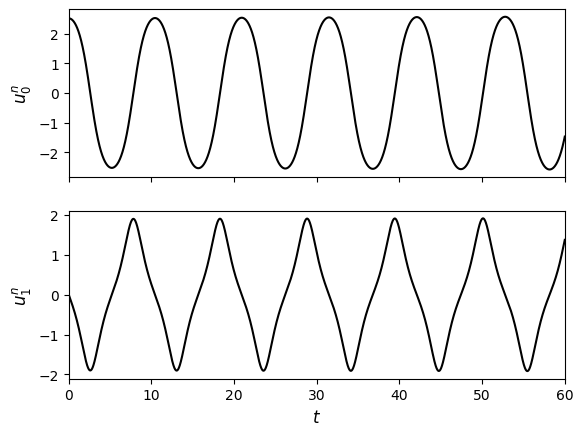

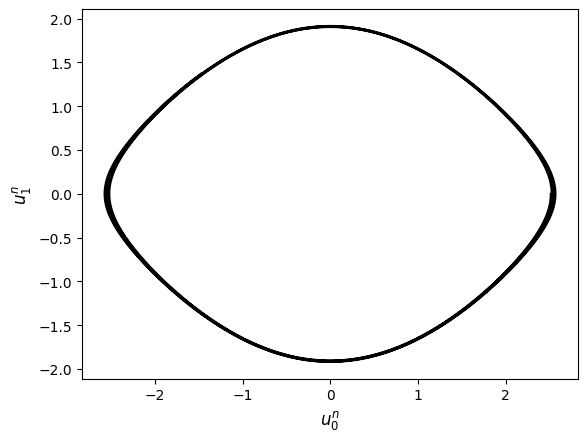

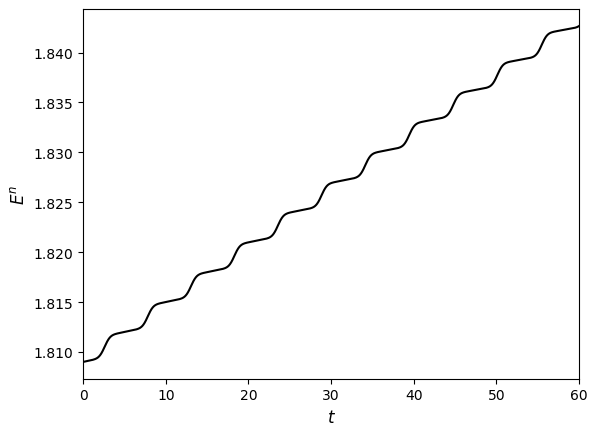

abs(u[:, 0]).max() / np.pi=5.602244877


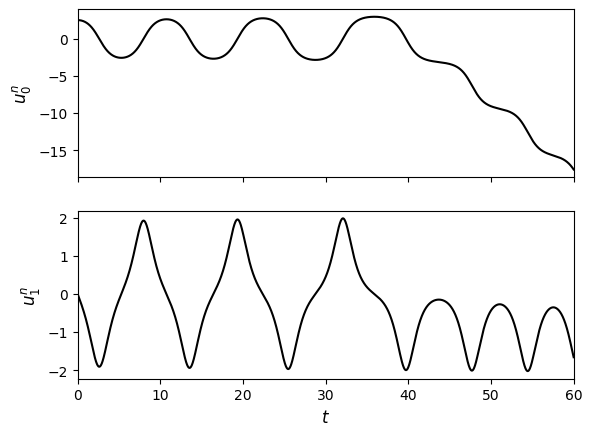

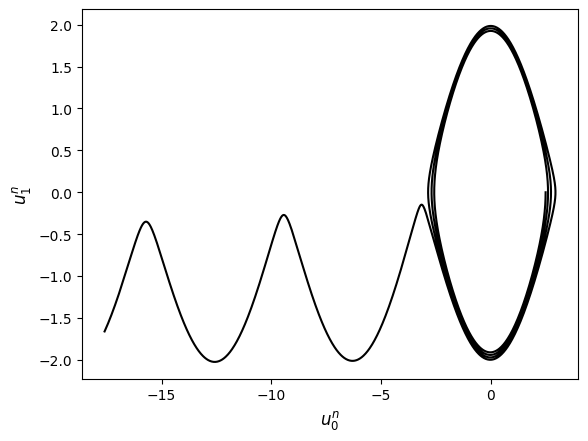

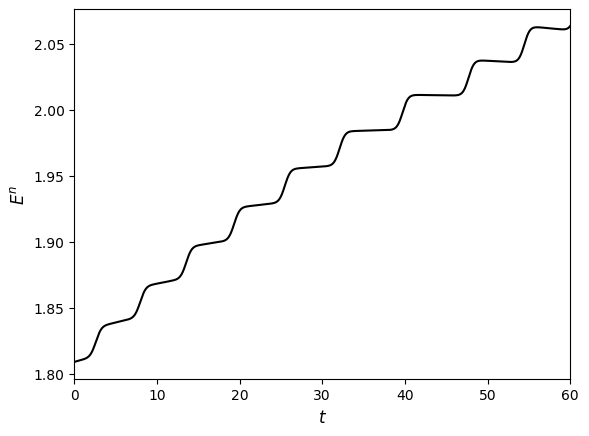

abs(u[:, 0]).max() / np.pi=62.72391387


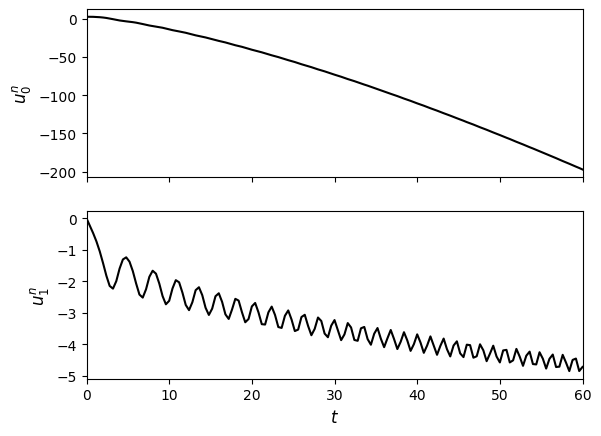

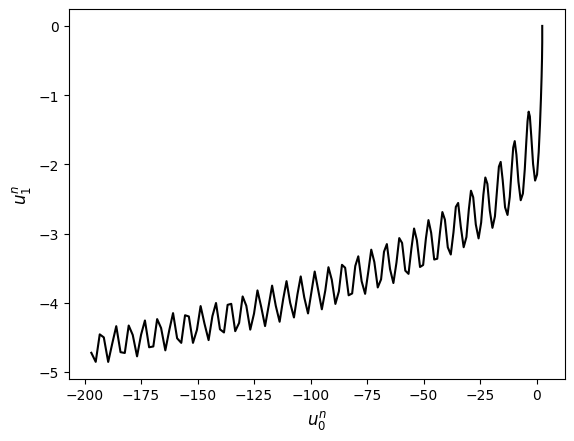

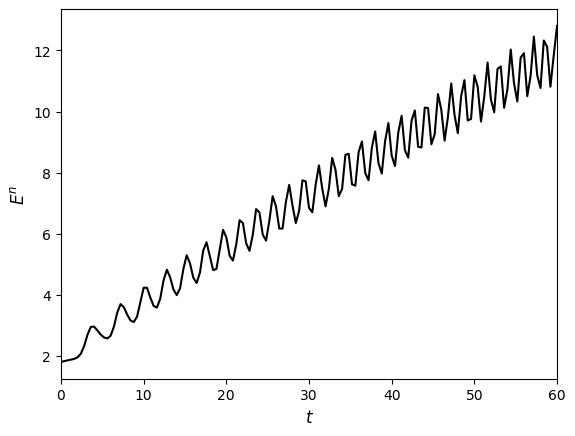

In [5]:
%matplotlib inline

from IPython.display import HTML, display
import numpy as np
import matplotlib.pyplot as plt


def timestep(u_0, N, T, step):
    """Take `N` timesteps for the non-linear oscillator problem.

    Parameters
    ----------

    u_0 : numpy.ndarray
        Initial condition. Shape `(2,)` with floating point data type.
    N : int
        Number of timesteps.
    T : float
        Time interval size.
    step : callable
        Takes a timestep. See e.g. :func:`step_forward_euler`.

    Returns
    -------

    numpy.ndarray
        The time. Shape `(N + 1,)`.
    numpy.ndarray
        The solution. Shape `(N + 1, 2)`.
    """
    
    h = T / N

    t = np.linspace(0, T, N + 1, dtype=float)
    u = np.zeros((N + 1, 2), dtype=float)
    u[0, :] = u_0
    for n in range(N):
        u[n + 1, :] = step(h, u[n, :])
    
    return t, u


def plot_u(t, u):
    """Plot the non-linear oscillator solution.

    Parameters
    ----------

    t : numpy.ndarray
        The time. Shape `(N + 1,)`.
    u : numpy.ndarray
        The solution. Shape `(N + 1, 2)`.
    """

    fig, ax = plt.subplots(2, 1, sharex=True)
    ax[0].plot(t, u[:, 0], "k-")
    ax[0].set_xlim(t[0], t[-1])
    ax[0].set_ylabel(r"$u_0^n$", fontsize="large")
    ax[1].plot(t, u[:, 1], "k-")
    ax[1].set_xlim(t[0], t[-1])
    ax[1].set_ylabel(r"$u_1^n$", fontsize="large")
    ax[1].set_xlabel(r"$t$", fontsize="large")


def plot_u_phase(u):
    """Plot a phase diagram, :math:`u_1` against :math:`u_0`, for the
    non-linear oscillator.

    Parameters
    ----------

    t : numpy.ndarray
        The time. Shape `(N + 1,)`.
    u : numpy.ndarray
        The solution. Shape `(N + 1, 2)`.
    """

    fig, ax = plt.subplots()
    ax.plot(u[:, 0], u[:, 1], "k-")
    ax.set_xlabel(r"$u_0^n$", fontsize="large")
    ax.set_ylabel(r"$u_1^n$", fontsize="large")


def plot_E(t, u):
    """Plot the non-linear oscillator energy.

    Parameters
    ----------

    t : numpy.ndarray
        The time. Shape `(N + 1,)`.
    u : numpy.ndarray
        The solution. Shape `(N + 1, 2)`.
    """
    
    fig, ax = plt.subplots()
    ax.plot(t, 0.5 * u[:, 1] ** 2 + 1 - np.cos(u[:, 0]), "k-")
    ax.set_xlim(t[0], t[-1])
    ax.set_ylabel(r"$E^n$", fontsize="large")
    ax.set_xlabel(r"$t$", fontsize="large")


def step_forward_euler(h, u_n):
    """Take a discrete timestep of the non-linear oscillator system using a
    forward Euler discretization.

    Parameters
    ----------

    h : float
        Timestep size.
    u_n : numpy.ndarray
        Previous timestep solution. Shape `(2,)` with floating point data type.

    Returns
    -------

    numpy.ndarray
        Next timestep solution. Shape `(2,)` with floating point data type.
    """

    return u_n + h * np.array([u_n[1], -np.sin(u_n[0])], dtype=u_n.dtype)


T = 60.0

N = 60000
display(HTML(f'<div style="font-size:16pt;">h = {T / N:g}</div>'))
t, u = timestep(np.array((0.8 * np.pi, 0), dtype=float),
                N, T, step_forward_euler)
print(f"{abs(u[:, 0]).max() / np.pi=:.10g}")
plot_u(t, u)
plot_u_phase(u)
plot_E(t, u)
plt.show()

N = 6000
display(HTML(f'<div style="font-size:16pt;">h = {T / N:g}</div>'))
t, u = timestep(np.array((0.8 * np.pi, 0), dtype=float),
                N, T, step_forward_euler)
print(f"{abs(u[:, 0]).max() / np.pi=:.10g}")
plot_u(t, u)
plot_u_phase(u)
plot_E(t, u)
plt.show()

N = 150
display(HTML(f'<div style="font-size:16pt;">h = {T / N:g}</div>'))
t, u = timestep(np.array((0.8 * np.pi, 0), dtype=float),
                N, T, step_forward_euler)
print(f"{abs(u[:, 0]).max() / np.pi=:.10g}")
plot_u(t, u)
plot_u_phase(u)
plot_E(t, u)
plt.show()

None

## Discussion

Noting that we will be considering different discretization choices in this and the following questions, we factor the code into a function which performs timestepping, and functions for plotting, which can be reused. Note that it is better to compute $h$ (timestep size) from $N$ (number of timesteps) and $T$ (time interval size), than to attempt to compute $N$ from $h$ and $T$ -- due to rounding, it is better to compute floating point values from integer inputs, than to compute integer values from floating point inputs.

The forward Euler discretization is readily implemented with the solution on the next timestep being computed directly using an explicit formula using the solution from the previous timstep.

While energy is conserved in the original system, we find that energy is not conserved after applying a forward Euler discretization, and moreover energy tends to increase over time.

For the given initial condition, with the pendulum initialized at a high angle but with no velocity, we expect the pendulum to oscillate backwards and forward with $u_0 \in [-4/5 \pi, 4/5 \pi]$ for all time. However, after applying a forward Euler discretization, and due to the tendency to gain energy over time, this is not the case. For smaller timestep sizes this effect is less pronounced. For $h = 0.001$ and $T = 60$ we find that $u_0$ exceeds the expected bounds, but the solution at least remains confined to within $u_0 \in (-\pi, \pi)$, corresponding to the pendulum oscillating. However for $h = 0.01$ the energy of the system increases more rapidly, and eventually increases to the point where the solution exceeds the bounds $u_0 \in (-\pi, \pi)$, corresponding to the pendulum rolling over the pivot point. For larger values of timestep size, such as for $h = 0.4$, the discrete system can gain energy even more quickly.

**3.2** We next seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is a type of *semi-implicit Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

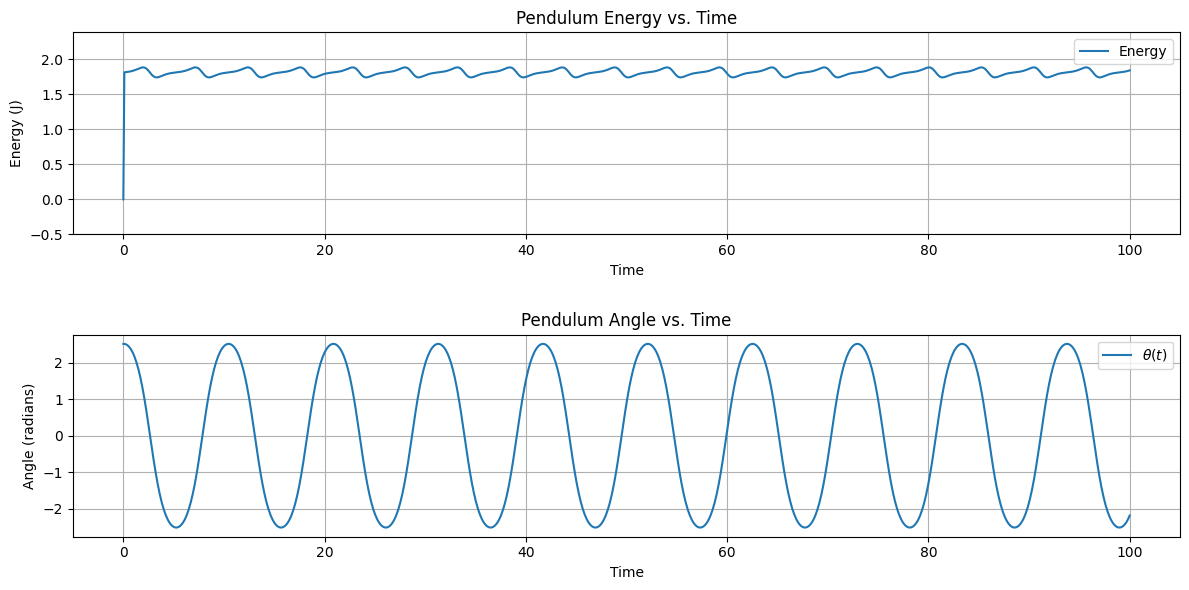

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define the semi-implicit Euler method for the pendulum equation
def pendulum_semi_implicit_euler(h, N):
    # Initial conditions
    theta_0 = (4/5) * np.pi  # Initial angle
    theta_1 = 0  # Initial angular velocity
    
    # Arrays to store the results
    theta_values = np.zeros(N)
    velocity_values = np.zeros(N)
    energy_values = np.zeros(N)  # Array to store energy values
    time_values = np.linspace(0, h*N, N)
    
    # Set initial values
    theta_values[0] = theta_0
    velocity_values[0] = theta_1
    
    # Semi-implicit Euler time-stepping
    for n in range(1, N):
        # Compute next angle using updated velocity
        theta_values[n] = theta_values[n-1] + h * velocity_values[n-1]
        # Compute next velocity using the updated angle
        velocity_values[n] = velocity_values[n-1] - h * np.sin(theta_values[n])
        
        # Calculate the energy at each step
        energy_values[n] = 0.5 * velocity_values[n]**2 + 1 - np.cos(theta_values[n])
    
    return time_values, theta_values, velocity_values, energy_values

# Parameters
h = 0.1  # Step size
N = 1000  # Number of time steps

# Run the simulation
time_values, theta_values, velocity_values, energy_values = pendulum_semi_implicit_euler(h, N)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot energy over time (zoom in on energy graph)
plt.subplot(2, 1, 1)  # Energy graph
plt.plot(time_values, energy_values, label="Energy")
plt.xlabel('Time')
plt.ylabel('Energy (J)')
plt.title('Pendulum Energy vs. Time')

# Zooming in on the energy graph (adjust y-axis limits)
plt.ylim(np.min(energy_values) - 0.5, np.max(energy_values) + 0.5)

plt.grid(True)
plt.legend()

# Plot theta over time (angle graph)
plt.subplot(2, 1, 2)  # Angle graph
plt.plot(time_values, theta_values, label=r'$\theta(t)$')
plt.xlabel('Time')
plt.ylabel('Angle (radians)')
plt.title('Pendulum Angle vs. Time')
plt.grid(True)
plt.legend()

# Adjust layout to give more space to the angle plot without affecting the energy plot
plt.tight_layout(h_pad=2.5, w_pad=0.5)
plt.show()


## Discussion
The semi-implicit Euler method is a modification of the forward Euler method where the velocity is updated using the current time step's velocity but the position (in this case, the angle) is updated using the next time step's velocity. This approach can offer advantages in terms of stability when dealing with systems that exhibit oscillatory or periodic behavior, such as the simple pendulum.
One of the key features of this method is its improved stability compared to the explicit forward Euler method, especially for stiff systems. In our case, the pendulum's behavior is oscillatory, and the semi-implicit Euler method helps mitigate the numerical instability seen in the forward Euler method. The energy of the system is conserved, and small oscillations in the energy plot suggest that the method is relatively stable, though slight numerical dissipation may still occur due to the discrete time steps.

**3.3** We finally seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^{n + 1}) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *backward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

**[9 marks]**

abs(u[:, 0]).max() / np.pi=0.8000000233


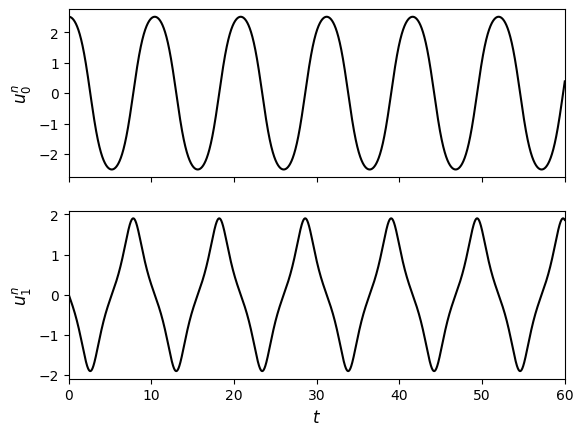

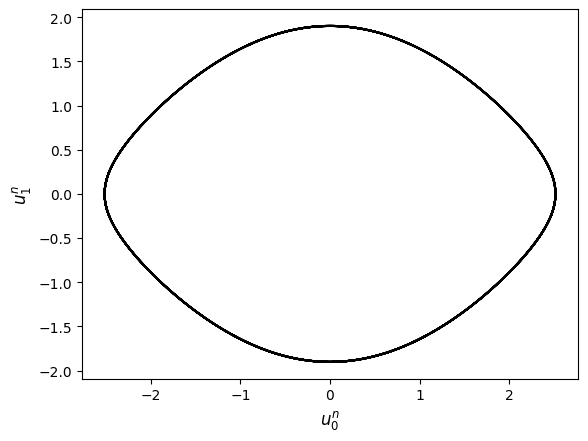

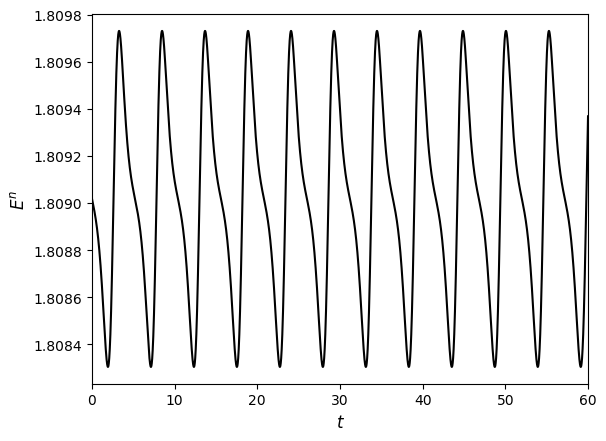

abs(u[:, 0]).max() / np.pi=0.8036478383


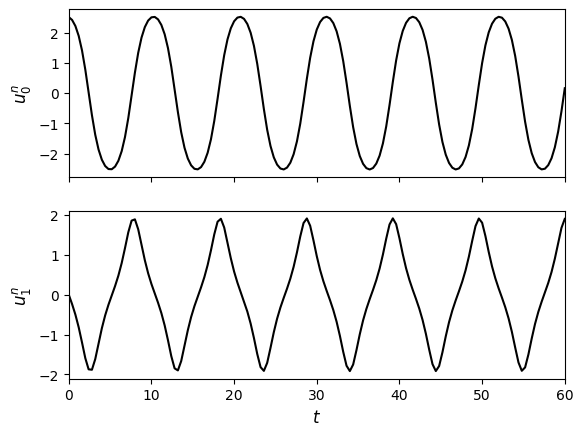

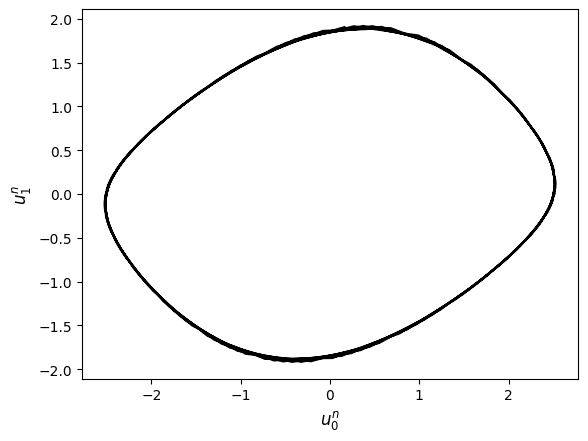

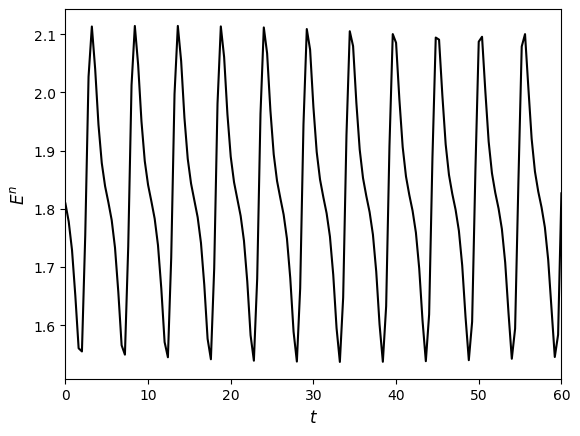

In [6]:
def step_semi_implicit_euler(h, u_n):
    """Take a discrete timestep of the non-linear oscillator system using a
    semi-implicit Euler discretization.

    Parameters
    ----------

    h : float
        Timestep size.
    u_n : numpy.ndarray
        Previous timestep solution. Shape `(2,)` with floating point data type.

    Returns
    -------

    numpy.ndarray
        Next timestep solution. Shape `(2,)` with floating point data type.
    """

    u_np1 = u_n.copy()
    u_np1[1] -= h * np.sin(u_n[0])
    u_np1[0] += h * u_np1[1]
    return u_np1


T = 60.0

N = 60000
display(HTML(f'<div style="font-size:16pt;">h = {T / N:g}</div>'))
t, u = timestep(np.array((0.8 * np.pi, 0), dtype=float),
                N, T, step_semi_implicit_euler)
print(f"{abs(u[:, 0]).max() / np.pi=:.10g}")
plot_u(t, u)
plot_u_phase(u)
plot_E(t, u)
plt.show()

N = 150
display(HTML(f'<div style="font-size:16pt;">h = {T / N:g}</div>'))
t, u = timestep(np.array((0.8 * np.pi, 0), dtype=float),
                N, T, step_semi_implicit_euler)
print(f"{abs(u[:, 0]).max() / np.pi=:.10g}")
plot_u(t, u)
plot_u_phase(u)
plot_E(t, u)
plt.show()

None



## Discussion

The backward Euler discretization is a fully implicit approach, and is more challenging to implement, as we no longer have a simple way to compute the value for $u^{n + 1}$ given $u^n$. Instead we can cast this as a root-finding problem, with residual

$$F(u^{n + 1}) = u^{n + 1} - u^n - h F(u^{n + 1}),$$

with associated Jacobian matrix

$$J^n ( u^{n + 1} ) = \left( \begin{array}{cc} 1 & -h \\ h \cos u^{n + 1}_0 & 1 \end{array} \right).$$

We can take a timestep by solving the root-finding problem using Newton's method, starting from an initial guess $u^k = u^n$ and then iterating via

$$u^{k + 1} = u^k - \left[ J^n ( u^k ) \right]^{-1} F(u^k) \qquad \text{for} ~ k \ge 0.$$

If this converges, say to $u^k_*$ then we have found a root at which $F(u^k_*) = 0$, and so we can set $u^{n + 1} \gets u^k_*.$

In numerical experiments with the backward Euler discretization we find that the bounds $u_0 \in [-4/5 \pi, 4/5 \pi]$ are respected. However energy is not conserved, and tends to decrease over time, with the solution spiralling in towards the point $u_0 = 0$ and $u_1 = 0$, which corresponds to a fixed-point where the pendulum is pointing down and is at rest. The loss of energy is more pronounced with larger time step sizes, and for $h = 0.4$ we find that the system rapidly decays towards the fixed-point.


**3.4** Which of the methods, considered in 3.1--3.3, would you use for this problem? Justify your answer. Your answer and justification should not exceed $250$ words, and may refer to your plots and discussions in your solutions to 3.1--3.3.

**[5 marks]**

## Discussion

The forward Euler discretization can be implemented using simple explicit formulae, and is efficient. However the forward Euler approach is unstable, with an increase in energy over time, and with an increase in energy which is more pronounced at larger time step sizes.

The backward Euler discretization is more challenging to implement, requiring the solution of a two-dimensional root-finding problem, and is also more expensive as implemented here, due to the use of Newton's method to solve the root-finding problem. The scheme is observed to be stable, and is found to obey expected bounds on the first component of the solution, but has a decrease in energy over time which is more pronounced at larger time step sizes.

The semi-implicit Euler discretization can be implemented using simple explicit formula, and is efficient. Energy is not exactly conserved, and expected bounds on the first component of the solution are not perfectly observed, but errors in each are found to be relatively modest, particularly at smaller timestep sizes. Hence the semi-implicit Euler discretization is to be preferred, over the other two methods, for this problem.

Each of the three methods is based on first order approximations -- in the language of ordinary differential equations we would say that they all have a 'first order local truncation error'. However they have different stability properties. Different types of errors, and how they are related by stability, are considered in more advanced courses on numerical differential equations.

The semi-implicit Euler discretization is a type of 'geometric' or 'symplectic' integrator, and performs well for problems with specific structure -- specifically for systems with 'Hamiltonian' structure. In particular they are good at approximately conserving the 'Hamiltonian' associated with these systems. The non-linear oscillator has the required structure, and the energy is the Hamiltonian, and hence this discretization performs well for this system and approximately conserves the energy. Geometric integrators are introduced in more advanced courses on numerical ordinary differential equations.